# Titanic - Machine Learning
ref：https://www.kaggle.com/c/titanic/submit

## Step 1: 載入套件

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier

## Step 2: 載入資料集

In [5]:
training_data = pd.read_csv('data/train.csv')
training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
testing_data = pd.read_csv('data/test.csv')
testing_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Step 3: Sex, Embarked先做encodeing

In [10]:
training_data['Sex'] = training_data['Sex'].map( {'female': 1, 'male': 0} )
training_data['Embarked'] = training_data['Embarked'].map( {'S': 2, 'C': 0, 'Q': 1} )

training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,2.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,2.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,0.0


In [12]:
testing_data['Sex'] = testing_data['Sex'].map( {'female': 1, 'male': 0} )
testing_data['Embarked'] = testing_data['Embarked'].map( {'S': 2, 'C': 0, 'Q': 1} )
testing_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,2


## Step 3: 檢查缺失值，並處裡

In [15]:
print('Training data: ')
print(training_data.isnull().sum())
print('-'*20)
print('Testing data: ')
print(testing_data.isnull().sum())

Training data: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
Testing data: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [17]:
# 移除cabin，因為缺失值太多，難以辨別關係與處裡空值。
# 移除ticket，因為重複類別太多(重複22%)，並且與生存可能不存在相關性(由圖表分析)
# 移除names，因為與生存率不相關
training_data.drop(labels=['Cabin', 'Ticket', 'Name'],axis=1, inplace=True)
testing_data.drop(labels=['Cabin', 'Ticket', 'Name'],axis=1, inplace=True)

In [19]:
print('Training data: ')
print(training_data.isnull().sum())
print('-'*20)
print('Testing data: ')
print(testing_data.isnull().sum())

Training data: 
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
--------------------
Testing data: 
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


In [21]:
#利用Random forest預測Age並補上數值
features = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Fare']
age_data_train = training_data[features + ['Age']]
age_data_test = testing_data[features + ['Age']]

# 將有 Age 的資料分為訓練集，無 Age 的分為測試集
training_train_age = age_data_train[age_data_train['Age'].notna()]
training_test_age = age_data_train[age_data_train['Age'].isna()]
testing_train_age = age_data_test[age_data_test['Age'].notna()]
testing_test_age = age_data_test[age_data_test['Age'].isna()]

In [23]:
# 訓練模型
training_rf = RandomForestRegressor(n_estimators=100)
training_rf.fit(training_train_age[features], training_train_age['Age'])

# 預測 Age
predicted_training_ages = np.round(training_rf.predict(training_test_age[features]))
predicted_testing_ages = np.round(training_rf.predict(testing_test_age[features]))

# 用預測值補全
training_data.loc[training_data['Age'].isna(), 'Age'] = predicted_training_ages
testing_data.loc[testing_data['Age'].isna(), 'Age'] = predicted_testing_ages

In [24]:
training_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2.0
1,2,1,1,1,38.0,1,0,71.2833,0.0
2,3,1,3,1,26.0,0,0,7.9250,2.0
3,4,1,1,1,35.0,1,0,53.1000,2.0
4,5,0,3,0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,2.0
887,888,1,1,1,19.0,0,0,30.0000,2.0
888,889,0,3,1,16.0,1,2,23.4500,2.0
889,890,1,1,0,26.0,0,0,30.0000,0.0


In [25]:
testing_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,1
1,893,3,1,47.0,1,0,7.0000,2
2,894,2,0,62.0,0,0,9.6875,1
3,895,3,0,27.0,0,0,8.6625,2
4,896,3,1,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,3,0,30.0,0,0,8.0500,2
414,1306,1,1,39.0,0,0,108.9000,0
415,1307,3,0,38.5,0,0,7.2500,2
416,1308,3,0,30.0,0,0,8.0500,2


In [26]:
# Taking the mean/average value would be impacted by the skew
# so we should use the median value to impute missing values
training_data["Embarked"] = training_data["Embarked"].fillna('2')
testing_data["Fare"] = testing_data["Fare"].fillna(testing_data["Fare"].median())

In [27]:
print('Training data: ')
print(training_data.isnull().sum())
print('-'*20)
print('Testing data: ')
print(testing_data.isnull().sum())

Training data: 
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
--------------------
Testing data: 
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [33]:
#將Age與Fare進行Standardization
ages_train = np.array(training_data["Age"]).reshape(-1, 1)
ages_test = np.array(testing_data["Age"]).reshape(-1, 1)
fares_train = np.array(training_data["Fare"]).reshape(-1, 1)
fares_test = np.array(testing_data["Fare"]).reshape(-1, 1)

# Scaler takes arrays
scaler = StandardScaler()

training_data["Age"] = scaler.fit_transform(ages_train)
testing_data["Age"] = scaler.fit_transform(ages_test)
training_data["Fare"] = scaler.fit_transform(fares_train)
testing_data["Fare"] = scaler.fit_transform(fares_test)

In [35]:
training_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,-0.555259,1,0,-0.502445,2.0
1,2,1,1,1,0.613609,1,0,0.786845,0.0
2,3,1,3,1,-0.263042,0,0,-0.488854,2.0
3,4,1,1,1,0.394446,1,0,0.420730,2.0
4,5,0,3,0,0.394446,0,0,-0.486337,2.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,-0.189988,0,0,-0.386671,2.0
887,888,1,1,1,-0.774422,0,0,-0.044381,2.0
888,889,0,3,1,-0.993584,1,2,-0.176263,2.0
889,890,1,1,0,-0.263042,0,0,-0.044381,0.0


In [37]:
testing_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,0.305419,0,0,-0.497413,1
1,893,3,1,1.251647,1,0,-0.512278,2
2,894,2,0,2.387121,0,0,-0.464100,1
3,895,3,0,-0.262318,0,0,-0.482475,2
4,896,3,1,-0.640809,1,1,-0.417492,2
...,...,...,...,...,...,...,...,...
413,1305,3,0,-0.035223,0,0,-0.493455,2
414,1306,1,1,0.646061,0,0,1.314435,0
415,1307,3,0,0.608212,0,0,-0.507796,2
416,1308,3,0,-0.035223,0,0,-0.493455,2


In [39]:
# Now to select our training/testing data
X_features = training_data.drop(labels=['PassengerId', 'Survived'], axis=1)
y_labels = training_data['Survived']

print(X_features.head(5))
print(y_labels.head(5))

# Make the train/test data from validation
X_train, X_val, y_train, y_val = train_test_split(X_features, y_labels, test_size=0.2,random_state=12)

   Pclass  Sex       Age  SibSp  Parch      Fare Embarked
0       3    0 -0.555259      1      0 -0.502445      2.0
1       1    1  0.613609      1      0  0.786845      0.0
2       3    1 -0.263042      0      0 -0.488854      2.0
3       1    1  0.394446      1      0  0.420730      2.0
4       3    0  0.394446      0      0 -0.486337      2.0
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


## Step 4: traning_data訓練模型

## Boosting Classification Example

Results for 20 estimators: 0.7990873015873017
Results for 40 estimators: 0.7991666666666667
Results for 60 estimators: 0.7922222222222224
Results for 80 estimators: 0.795
Results for 100 estimators: 0.8005952380952381
Results for 130 estimators: 0.8134126984126985
Results for 150 estimators: 0.8106349206349208
Results for 170 estimators: 0.8077380952380953
Results for 200 estimators: 0.8021031746031747


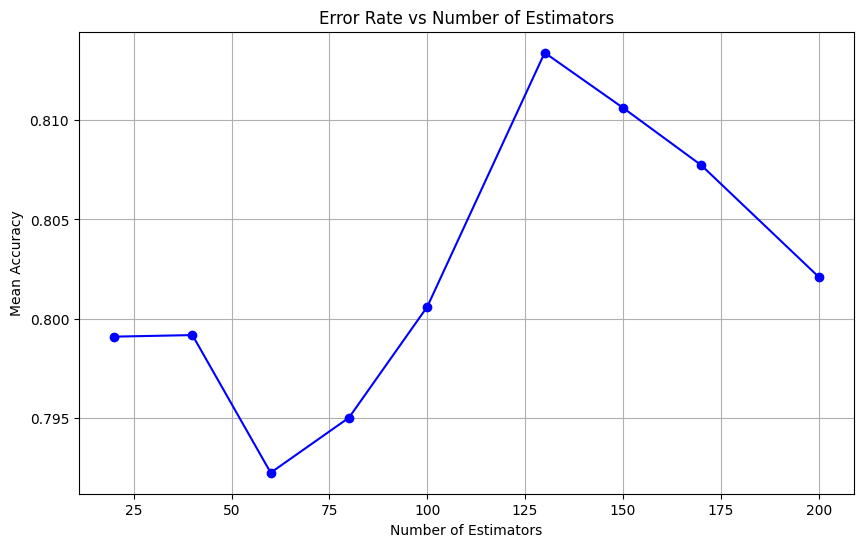

In [420]:
k_folds = KFold(n_splits=20, random_state=12,shuffle=True)
num_estimators = [20,40,60, 80, 100, 130, 150, 170, 200]
mean_results = []

for i in num_estimators:
    ada_boost = AdaBoostClassifier(n_estimators=i, algorithm='SAMME', random_state=12)
    results = cross_val_score(ada_boost, X_train, y_train, cv=k_folds)
    mean_results.append(results.mean())
    print("Results for {} estimators: {}".format(i, results.mean()))

plt.figure(figsize=(10, 6))
plt.plot(num_estimators, mean_results, marker='o', linestyle='-', color='b')
plt.title('Error Rate vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Accuracy')
plt.grid(True)

In [42]:
ada_boost = AdaBoostClassifier(n_estimators=130, algorithm='SAMME', random_state=12)
ada_boost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=130, random_state=12)

In [44]:
predictions_ada = ada_boost.predict(X_val)

In [46]:
accuracy = accuracy_score(y_val, predictions_ada)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8044692737430168


## Step 5: 將模型套用在testing_data

In [63]:
testing_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,0.305419,0,0,-0.497413,1
1,893,3,1,1.251647,1,0,-0.512278,2
2,894,2,0,2.387121,0,0,-0.464100,1
3,895,3,0,-0.262318,0,0,-0.482475,2
4,896,3,1,-0.640809,1,1,-0.417492,2
...,...,...,...,...,...,...,...,...
413,1305,3,0,-0.035223,0,0,-0.493455,2
414,1306,1,1,0.646061,0,0,1.314435,0
415,1307,3,0,0.608212,0,0,-0.507796,2
416,1308,3,0,-0.035223,0,0,-0.493455,2


In [65]:
test = testing_data.drop(labels=['PassengerId'],axis=1)
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,0.305419,0,0,-0.497413,1
1,3,1,1.251647,1,0,-0.512278,2
2,2,0,2.387121,0,0,-0.464100,1
3,3,0,-0.262318,0,0,-0.482475,2
4,3,1,-0.640809,1,1,-0.417492,2
...,...,...,...,...,...,...,...
413,3,0,-0.035223,0,0,-0.493455,2
414,1,1,0.646061,0,0,1.314435,0
415,3,0,0.608212,0,0,-0.507796,2
416,3,0,-0.035223,0,0,-0.493455,2


In [67]:
submissiom_df = pd.DataFrame(columns=['PassengerId','Survived'])
submissiom_df

,PassengerId,Survived


In [69]:
submissiom_df['PassengerId'] = testing_data['PassengerId']
submissiom_df

,PassengerId,Survived
0,892,NaN
1,893,NaN
2,894,NaN
3,895,NaN
4,896,NaN
...,...,...
413,1305,NaN
414,1306,NaN
415,1307,NaN
416,1308,NaN


In [71]:
submissiom_df['Survived'] = ada_boost.predict(test)
submissiom_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [73]:
submissiom_df.to_csv('submissiom_1.csv',header=True, index=False)